
## Database Analysis 

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Open excel file
df = pd.read_excel(r"C:\Users\diana\OneDrive - Universidade do Porto\Mestrado\Master_Thesis_MBBC\Results\species_plastic_DB.xlsx")
df.shape

(99, 8)

Species Barplot

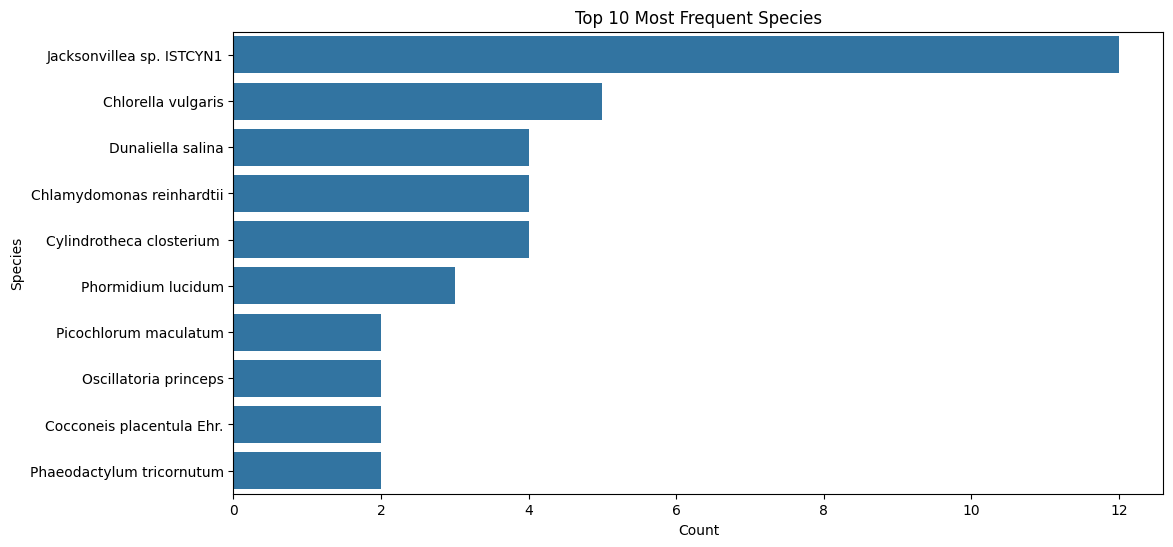

In [4]:
species_count = df['Species'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=species_count.index, 
            x=species_count.values, 
            orient = 'h',
            legend=False)

plt.ylabel('Species')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Species')

plt.show()

Plastic Type Barplot

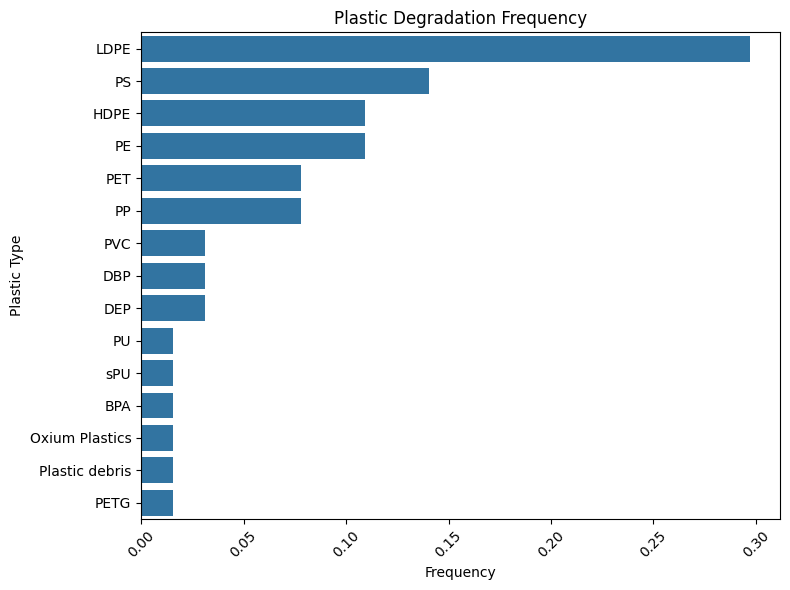

In [5]:
# Count the frequency of each plastic type
plastic_freq = df['Plastic Degraded'].value_counts(5)


# Create a barplot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(y=plastic_freq.index, x=plastic_freq.values,
            orient = 'h')

# Adding labels and title
plt.ylabel('Plastic Type')
plt.xlabel('Frequency')
plt.title('Plastic Degradation Frequency')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

Dataset Dimensions: 99 rows × 8 columns

Column Names:
- Species
- Type
- Plastic Degraded
- Naturally Produced
- Enzyme
- Degradation Efficiency
- Conditions of Degradation
- Article Link 

Summary Statistics:
- Total number of entries: 99
- Number of unique species: 68
- Number of unique plastic types: 15
- Number of unique enzymes: 12


C:\Users\diana\AppData\Local\Temp\ipykernel_8756\918480975.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=plastic_counts.index, y=plastic_counts.values, palette=colors)
C:\Users\diana\AppData\Local\Temp\ipykernel_8756\918480975.py:23: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(x=plastic_counts.index, y=plastic_counts.values, palette=colors)
c:\Users\diana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_ba

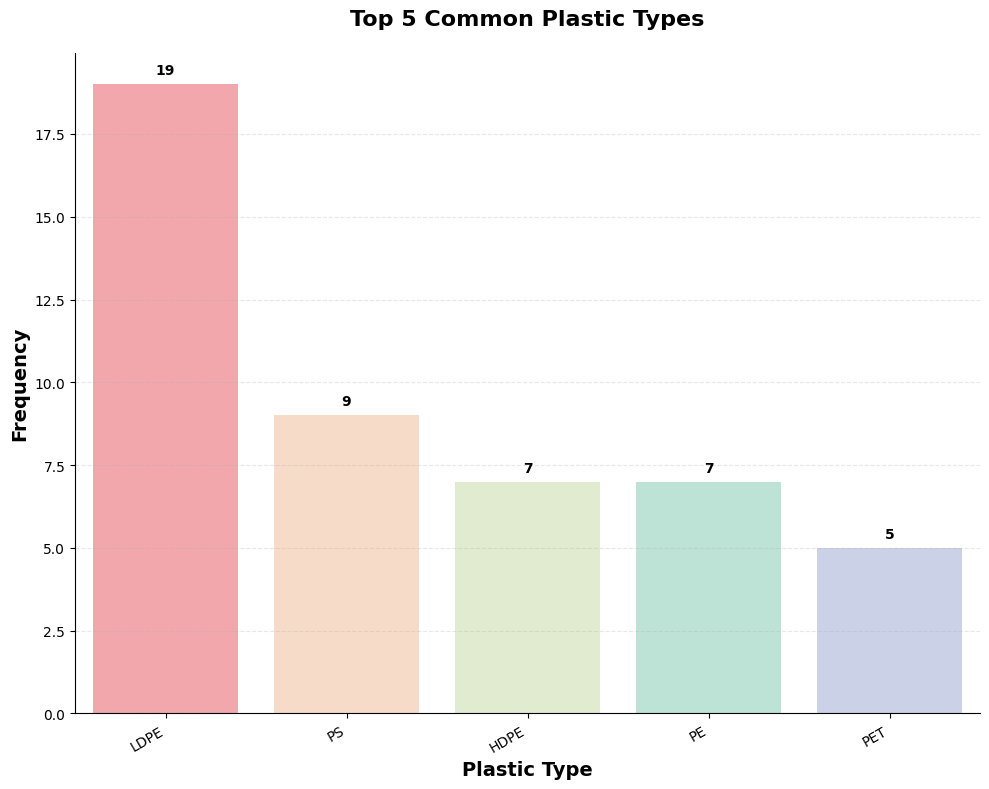

In [6]:
# Basic dataset information
print(f"Dataset Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nColumn Names:")
for col in df.columns:
    print(f"- {col}")

print("\nSummary Statistics:")
print(f"- Total number of entries: {len(df)}")
print(f"- Number of unique species: {df['Species'].nunique()}")
print(f"- Number of unique plastic types: {df['Plastic Degraded'].nunique()}")
print(f"- Number of unique enzymes: {df['Enzyme'].nunique()}")

# Remove rows with NA values in Plastic Degraded for some visualizations
df_plastic = df[df['Plastic Degraded'] != 'NA'].copy()

# 1. Create a beautiful vertical bar chart for plastic types
plt.figure(figsize=(10, 8))
plastic_counts = df_plastic['Plastic Degraded'].value_counts().head(5)

# Custom vibrant color palette
colors = ['#FF9AA2', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA', '#FF8B94', '#FFD8B1', '#9ADCFF']

ax = sns.barplot(x=plastic_counts.index, y=plastic_counts.values, palette=colors)

# Add data labels on top of bars
for i, v in enumerate(plastic_counts.values):
    ax.text(i, v + 0.3, str(v), ha='center', fontweight='bold')

# Styling
plt.title('Top 5 Common Plastic Types', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Plastic Type', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('plastic_types_bar.png', dpi=300, bbox_inches='tight')
plt.show()

Organism Type Counts:
Microalgae: 53
Cyanobacteria: 39
Diatoms: 7


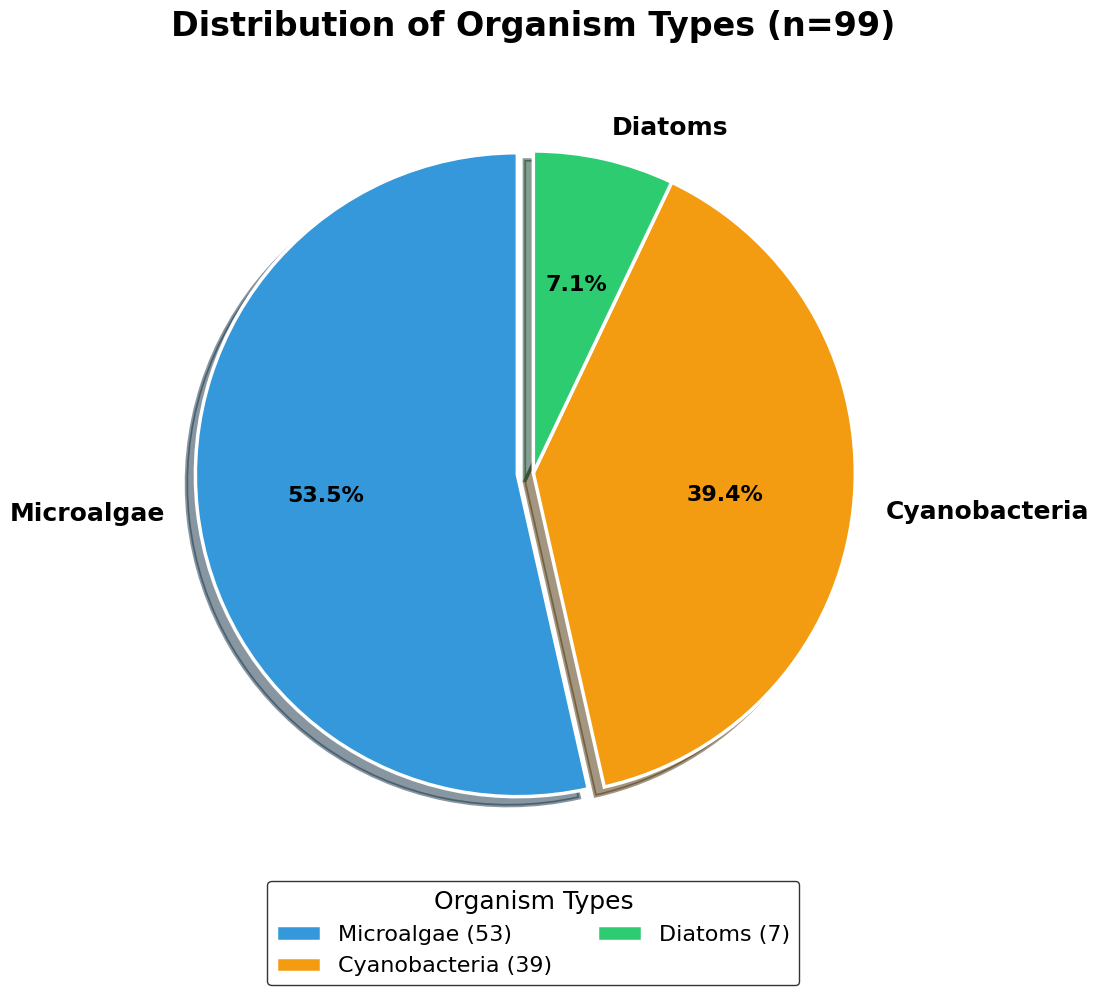

In [7]:
# Count occurrences of each organism type
type_counts = df['Type'].value_counts()

# Print the counts for reference
print("Organism Type Counts:")
for type_name, count in type_counts.items():
    print(f"{type_name}: {count}")

# Create a pie chart with enhanced visuals
plt.figure(figsize=(12, 10))  # Increased figure size for better visibility on a poster

# Define a vibrant color palette that pops on a poster
colors = ['#3498DB', '#F39C12', '#2ECC71', '#E74C3C', '#9B59B6']

# Create the pie chart with customizations
wedges, texts, autotexts = plt.pie(
    type_counts.values,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=colors,
    explode=[0.05] + [0] * (len(type_counts) - 1),  # Slightly explode the first slice
    textprops={'fontsize': 18, 'fontweight': 'bold'},  # Increased font size for labels
    wedgeprops={'edgecolor': 'white', 'linewidth': 2.5}  # Thicker edge lines
)

# Customize the percentage text for better visibility
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(16)  # Increased font size for percentages
    autotext.set_fontweight('bold')

# Add a title with the total count - much larger for poster visibility
plt.title(f'Distribution of Organism Types (n={len(df)})',
          fontsize=24, fontweight='bold', pad=25)  # Increased title size

# Add actual count values inside or next to each wedge
for i, (wedge, label_text) in enumerate(zip(wedges, texts)):
    # Get angle for text positioning
    ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    x = 1.4 * np.cos(np.deg2rad(ang))  # Slightly increased distance
    y = 1.4 * np.sin(np.deg2rad(ang))
    
    # Add the count next to the label
    count_text = f"{type_counts.values[i]}"
    plt.annotate(count_text, xy=(x, y),
                 ha='center', va='center',
                 fontsize=18, fontweight='bold')  # Increased font size for counts

# Add a thin border around the chart
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)


# Add a legend with larger text at the bottom
plt.legend(
    wedges, 
    [f"{label} ({count})" for label, count in zip(type_counts.index, type_counts.values)],
    title="Organism Types",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    fontsize=16,
    title_fontsize=18,
    frameon=True,
    edgecolor='black',
    ncol=2
)

# Tight layout for better spacing
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('organism_types_pie.png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()

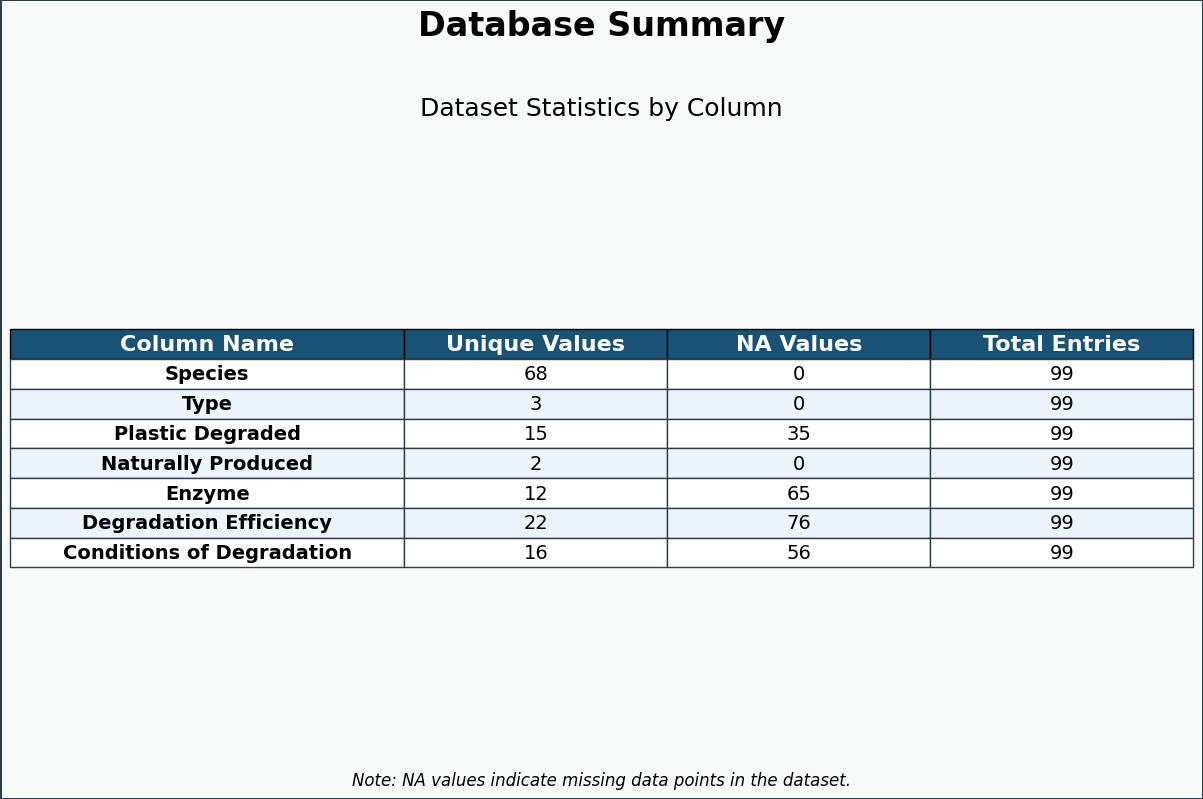

In [8]:
# Create a table visualization with improved styling for poster presentation
fig, ax = plt.subplots(figsize=(12, 8))  # Increased size for better visibility
ax.axis('off')
ax.axis('tight')

# Get column names from the dataframe
columns = df.columns.tolist()

# Calculate unique counts and NA counts
unique_counts = {}
na_counts = {}

for col in columns:
    unique_counts[col] = df[col].nunique()
    na_counts[col] = df[col].isna().sum()

# Store NA counts in a separate dictionary
unique_counts['NA_counts'] = na_counts

# Get total number of entries
total_entries = len(df)

# Prepare data for the table
table_data = []
for col in columns[:-1]:  # Excluding the last column if needed
    na_count = unique_counts['NA_counts'][col] if col in unique_counts['NA_counts'] else 0
    table_data.append([col, unique_counts[col], na_count, total_entries])

# Create the table
table = ax.table(cellText=table_data,
                 colLabels=['Column Name', 'Unique Values', 'NA Values', 'Total Entries'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.3, 0.2, 0.2, 0.2])

# Style the table - increase font size for poster visibility
table.auto_set_font_size(False)
table.set_fontsize(14)  # Increased font size
table.scale(1.2, 1.8)   # Increased vertical scaling for better spacing

# Add colored headers with a more professional color scheme
header_color = '#1A5276'  # Darker blue for headers
for i, key in enumerate(['Column Name', 'Unique Values', 'NA Values', 'Total Entries']):
    table[(0, i)].set_facecolor(header_color)
    table[(0, i)].set_text_props(color='white', fontweight='bold', fontsize=16)  # Larger header text

# Style the data cells
for i in range(1, len(table_data) + 1):
    # Alternate row colors for better readability
    row_color = '#EBF5FB' if i % 2 == 0 else 'white'  # Light blue alternate rows
    
    for j in range(4):
        cell = table[(i, j)]
        cell.set_facecolor(row_color)
        
        # Add borders to all cells
        cell.set_edgecolor('#2C3E50')
        cell.set_linewidth(1)
        
        # Make text bold for first column (Column Name)
        if j == 0:
            cell.set_text_props(fontweight='bold')

# Add a title and subtitle
plt.suptitle('Database Summary', fontsize=24, fontweight='bold', y=0.98)
plt.title('Dataset Statistics by Column', fontsize=18, fontweight='normal', pad=20)

# Add a caption/note below the table
caption = "Note: NA values indicate missing data points in the dataset."
plt.figtext(0.5, 0.01, caption, ha='center', fontsize=12, style='italic')

# Add a border around the entire figure
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('#2C3E50')

# Better spacing and background
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for title and caption
fig.patch.set_facecolor('#F8F9F9')  # Light gray background

# Save with higher resolution
plt.savefig('dataset_summary_table.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\diana\AppData\Local\Temp\ipykernel_8756\2963884207.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\diana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diana\AppData\Local\Programs\Python\Python3

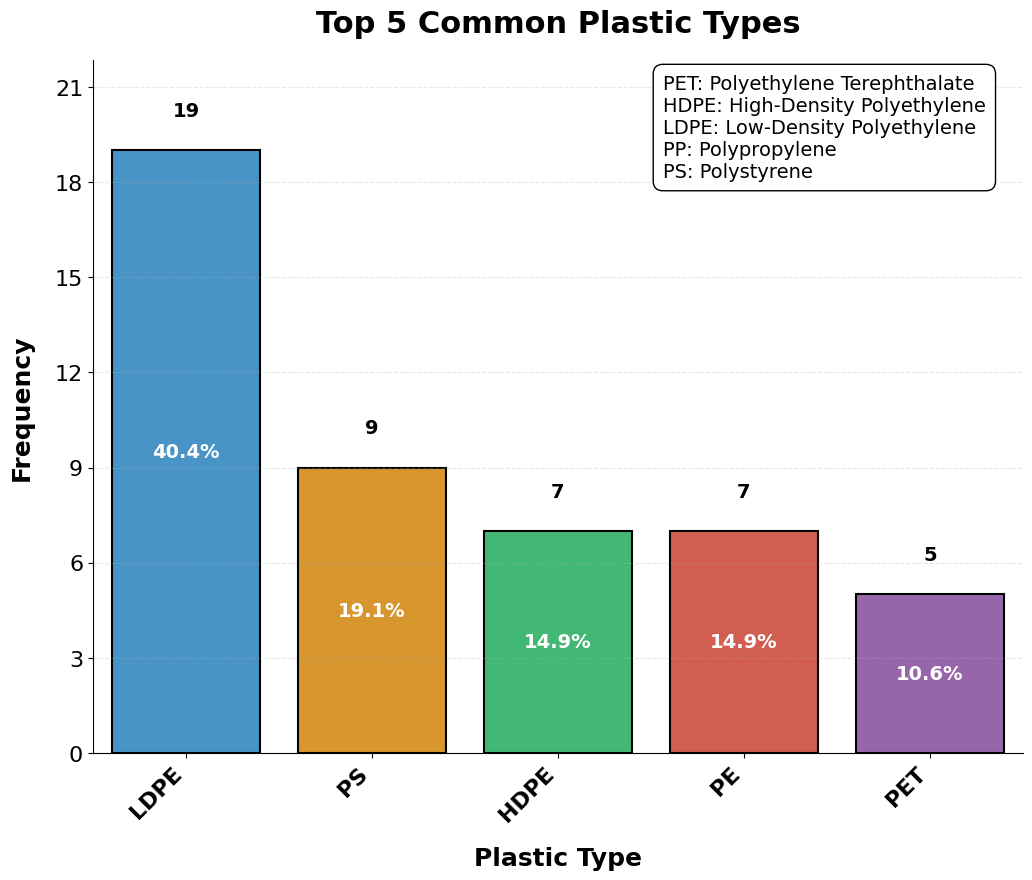

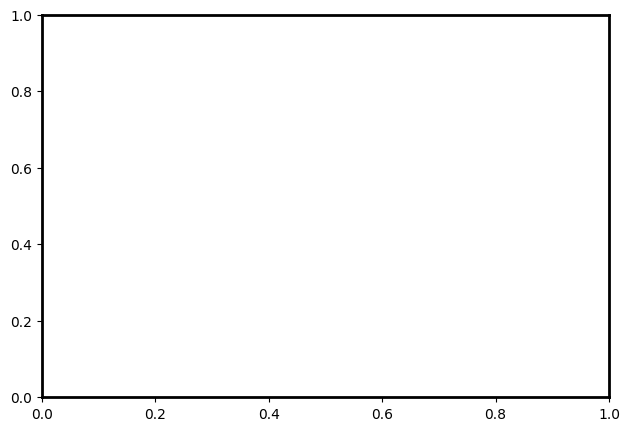

In [14]:
# Remove rows with NA values in Plastic Degraded for some visualizations
df_plastic = df[df['Plastic Degraded'] != 'NA'].copy()

# Create a professional vertical bar chart for plastic types
plt.figure(figsize=(12, 9))  # Larger figure size for poster visibility

# Get the top 5 plastic types
plastic_counts = df_plastic['Plastic Degraded'].value_counts().head(5)

# Custom vibrant color palette with better contrast
colors = ['#3498DB', '#F39C12', '#2ECC71', '#E74C3C', '#9B59B6']

# Create bar plot with enhanced styling
ax = sns.barplot(
    x=plastic_counts.index, 
    y=plastic_counts.values, 
    palette=colors,
    edgecolor='black',  # Black edge for definition
    linewidth=1.5       # Thicker edge
)

# Increase y-axis limit to provide more space at the top
# Add 15% padding to the top to ensure numbers don't cross any lines
y_max = max(plastic_counts.values)
plt.ylim(0, y_max * 1.15)  # Increased from default to provide more space

# Set integer ticks on y-axis
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add data labels on top of bars with better positioning and formatting
for i, v in enumerate(plastic_counts.values):
    ax.text(i, v + (y_max * 0.05), str(v), 
            ha='center', va='bottom',
            fontsize=14, fontweight='bold')

# Enhanced styling for poster presentation
plt.title('Top 5 Common Plastic Types', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Plastic Type', fontsize=18, fontweight='bold', labelpad=15)
plt.ylabel('Frequency', fontsize=18, fontweight='bold', labelpad=15)

# Add a subtle grid but only on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Remove top and right spines for cleaner look
sns.despine()

# Increase tick label size
plt.xticks(rotation=45, ha='right', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)

# Add value annotations as percentages
total = sum(plastic_counts.values)
for i, v in enumerate(plastic_counts.values):
    percentage = (v / total) * 100
    ax.text(i, v/2, f"{percentage:.1f}%", 
            ha='center', va='center',
            fontsize=14, fontweight='bold', color='white')
    

# Define plastic abbreviations and full names
plastic_legend = {
    "PET": "Polyethylene Terephthalate",
    "HDPE": "High-Density Polyethylene",
    "LDPE": "Low-Density Polyethylene",
    "PP": "Polypropylene",
    "PS": "Polystyrene"
}

# Create legend text
legend_text = "\n".join([f"{key}: {value}" for key, value in plastic_legend.items()])

# Add legend as a text box
plt.gcf().text(0.60, 0.75, legend_text, fontsize=14, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot
plt.show()


# Add a border around the figure
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Better spacing with more top margin
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Increased top margin (0.97 -> 0.95)

# Save with higher resolution
plt.savefig('plastic_types_bar.png', dpi=400, bbox_inches='tight')
plt.show()


